#### Author : Maximiliano Lopez Salgado
#### First commit: 2023-05-10
#### Last commit: 2023-05-25
#### Description: This notebook is used to perform EDA on the bike data set

In [312]:
# import ML libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import os
import folium
from folium.plugins import HeatMap
import requests
import polyline

<center><h1>Exploratory Data Analysis</center></h1>

#### Formulate some hypothesis and plot the data to check if the hypothesis are true. 
#### I.E: Hourly trend: most of the businesses have rush hours and weak hours. It should not be an exception for bike rentals as well. 
#### Daily Trend: weekdays vs weekends and registered users vs casual users.. 
#### Rain: the demand for bikes might be changed on a rainy day as compared to a sunny day. Similarly, people prefer to go out on less humid days..
#### Temperature: in warm countries, temperature generally keeps people inside. You have to check Washington DC's temperature for making any guess.. 
#### Business model: businesses often rely on registered customers more than casual users. There might be some interesting insights that can strengthen this assumption.

# Rentals_time_weather dataset

In [313]:
# import rentals_time_weather data
rentals_time_weather = pd.read_csv('/Users/maximilianolopezsalgado/data_projects/capital_bike_sharing/datasets/rentals_time_weather.csv')

# print first 5 rows
rentals_time_weather.head()

,instant,date,season,year,month,hour,holiday,weekday,workingday,weather,...,apparent_temp,humidity,windspeed,casual_user,registered_user,count,day_period,warmness,humidity_level,windspeed_level
0,1,2011-01-01,Winter,2011,January,0,No,Sunday,No,Clear,...,3.0014,0.81,0.0,3,13,16,Dawn,Cold,High,Low
1,2,2011-01-01,Winter,2011,January,1,No,Sunday,No,Clear,...,1.9982,0.80,0.0,8,32,40,Dawn,Cold,High,Low
2,3,2011-01-01,Winter,2011,January,2,No,Sunday,No,Clear,...,1.9982,0.80,0.0,5,27,32,Dawn,Cold,High,Low
3,4,2011-01-01,Winter,2011,January,3,No,Sunday,No,Clear,...,3.0014,0.75,0.0,3,10,13,Dawn,Cold,High,Low
4,5,2011-01-01,Winter,2011,January,4,No,Sunday,No,Clear,...,3.0014,0.75,0.0,0,1,1,Dawn,Cold,High,Low


# Hypothesis (12)

In [329]:
# create two new df to check the number of bike rentals in each season in 2011 and 2012 and order it in descending order
rentals_2011 = rentals_time_weather[rentals_time_weather['year'] == 2011]
rentals_2012 = rentals_time_weather[rentals_time_weather['year'] == 2012]

In [348]:
# create a function to plot the number of bike rentals in each variable column in 2011 and 2012
def analyze_variable(rentals_2011, rentals_2012, variable, max_count):
    # Group the data by the variable and calculate the total counts for casual and registered users
    rentals_2011_variable = rentals_2011.groupby(variable)[['casual_user', 'registered_user']].sum()
    rentals_2012_variable = rentals_2012.groupby(variable)[['casual_user', 'registered_user']].sum()

    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # Plot for 2011
    ax1.bar(rentals_2011_variable.index, rentals_2011_variable['casual_user'], label='Casual User')
    ax1.bar(rentals_2011_variable.index, rentals_2011_variable['registered_user'], bottom=rentals_2011_variable['casual_user'], label='Registered User')
    ax1.set_xlabel(variable)
    ax1.set_ylabel('Count')
    ax1.set_title('Bike Rentals in 2011')
    ax1.legend()
    ax1.set_ylim(0, max_count)  # Set the y-axis limit

    # Plot for 2012
    ax2.bar(rentals_2012_variable.index, rentals_2012_variable['casual_user'], label='Casual User')
    ax2.bar(rentals_2012_variable.index, rentals_2012_variable['registered_user'], bottom=rentals_2012_variable['casual_user'], label='Registered User')
    ax2.set_xlabel(variable)
    ax2.set_ylabel('Count')
    ax2.set_title('Bike Rentals in 2012')
    ax2.legend()
    ax2.set_ylim(0, max_count)  # Set the y-axis limit

    # Adjust the spacing between subplots
    plt.tight_layout()

    # Show the figure
    plt.show()

## Hypothesis 1

#### If the value of the the season column is equal to summer, then the number of bike rentals will be higher than the other seasons.

In [314]:
# create two pivot tables to check the number of bike rentals in each season in 2011 and 2012 and order it in descending order
rentals_time_weather.pivot_table(index='season', columns='year', values='count', aggfunc='sum').sort_values(by=2012, ascending=False)
rentals_time_weather.pivot_table(index='season', columns='year', values='count', aggfunc='sum').sort_values(by=2011, ascending=False)

year,2011,2012
season,,
Summer,419650,641479
Spring,347316,571273
Fall,326137,515476
Winter,150000,321348


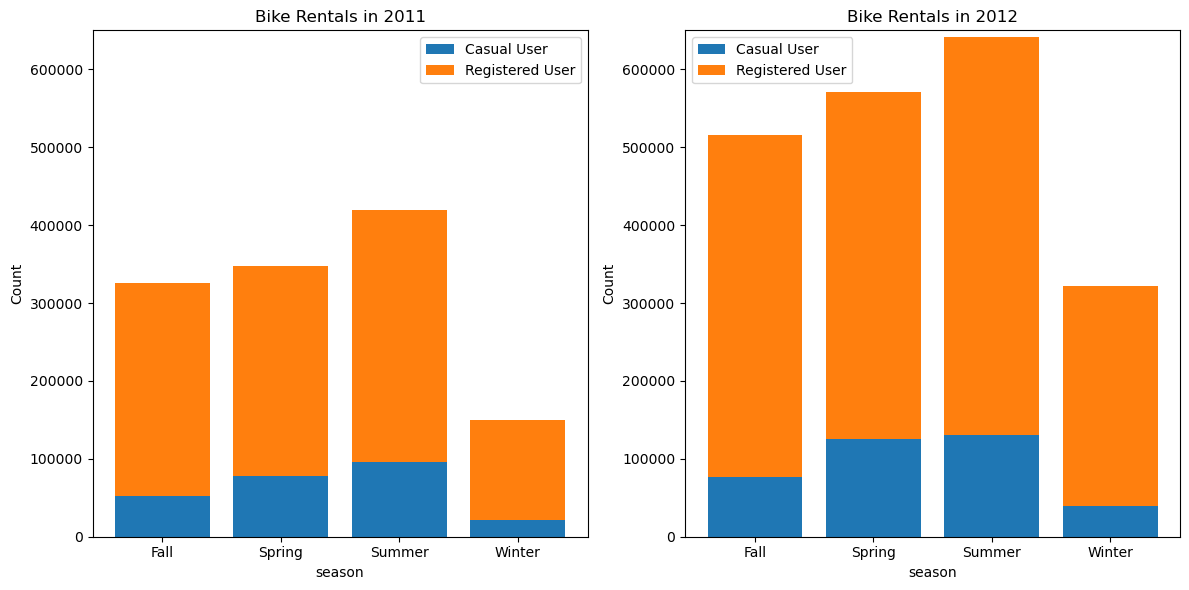

In [352]:
# plot the number of bike rentals in each season in 2011 and 2012
analyze_variable(rentals_2011, rentals_2012, 'season', 650000)

#### Conclusion 1: Hypothesis 1 is true, the number of bike rentals is higher during the summer season

## Hypothesis 2

#### If the value of the the weather column is equal to clean, then the number of bike rentals will be higher than the other seasons


In [333]:
# Create a pivot table to check the number of bike rentals in each weather column value in 2011 and 2012 and order it in descending order
rentals_time_weather.pivot_table(index='weather', columns='year', values='count', aggfunc='sum').sort_values(by=2012, ascending=False)
rentals_time_weather.pivot_table(index='weather', columns='year', values='count', aggfunc='sum').sort_values(by=2011, ascending=False)

year,2011,2012
weather,,
Clear,875053,1463120
Mist-Cloudy,300519,495433
Light-Rain,67495,90836
Heavy-Rain,36,187


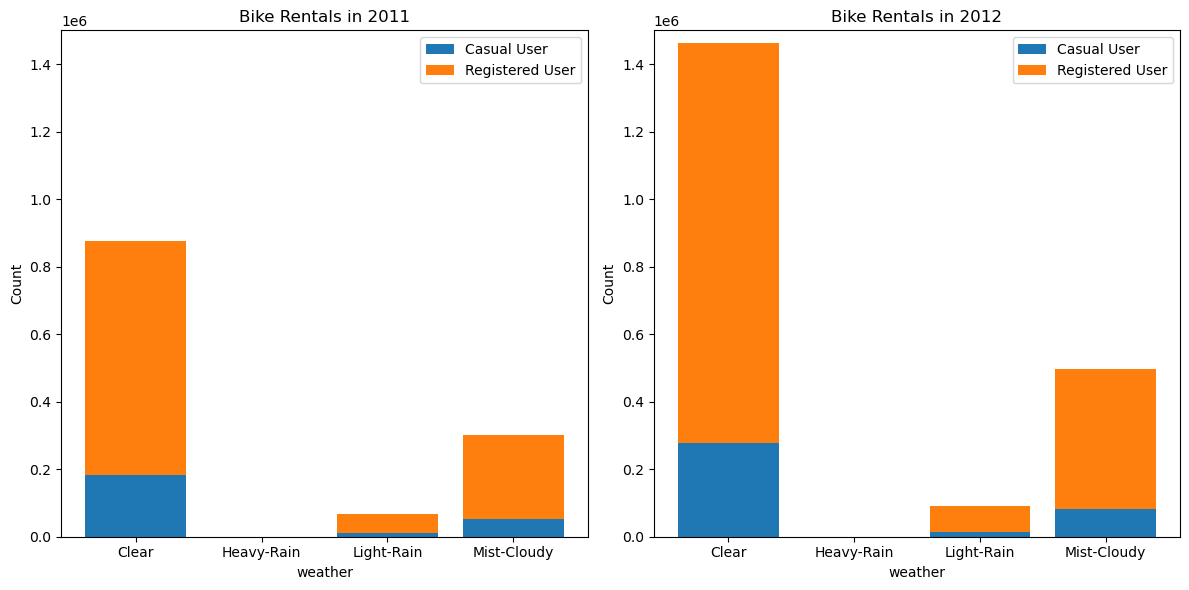

In [353]:
# plot the number of bike rentals in each weather in 2011 and 2012
analyze_variable(rentals_2011, rentals_2012, 'weather', 1500000)

#### Conclusion 1: Hypothesis 2 is true, the number of bike rentals is higher when the weather is clear

## Hypothesis 3

#### If the value of the the temperature column is equal to hot, then the number of bike rentals will be higher than the other seasons


In [347]:
# Create two pivot tables to check the number of bike rentals in each warmness column value in 2011 and 2012 and order it in descending order
rentals_time_weather.pivot_table(index='warmness', columns='year', values='count', aggfunc='sum').sort_values(by=2012, ascending=False)
rentals_time_weather.pivot_table(index='warmness', columns='year', values='count', aggfunc='sum').sort_values(by=2011, ascending=False)

year,2011,2012
warmness,,
Hot,463595,760905
Cold,305533,526595
Warm,262185,425526
Very Hot,211790,336550


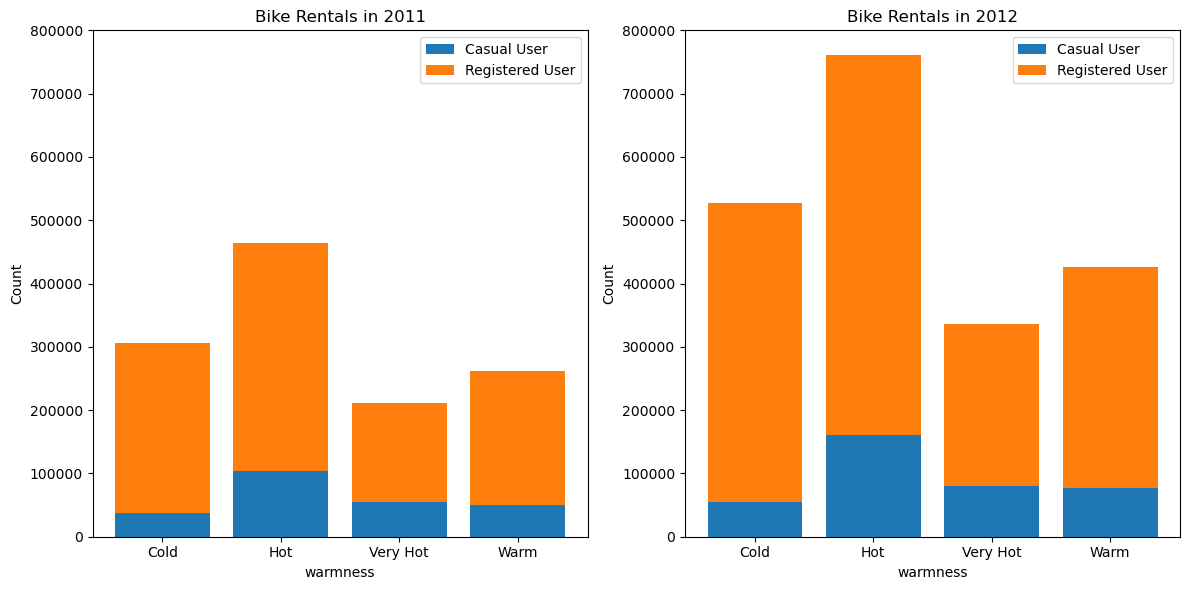

In [355]:
# plot the number of bike rentals in each warmness in 2011 and 2012
analyze_variable(rentals_2011, rentals_2012, 'warmness', 800000)

#### Conclusion 1: Hypothesis 3 is true, the number of bike rentals is higher when the temperature is hot. Surprisingly cold weather is in the position number 2. 

## Hypothesis 4

#### If the value of the the working day column is equal to yes, then the number of bike rentals by registered members will be higher than the non registered members and vice versa

In [356]:
# Create two pivot tables to check the number of bike rentals in each workingday column value in 2011 and 2012 and order it in descending order
rentals_time_weather.pivot_table(index='workingday', columns='year', values='count', aggfunc='sum').sort_values(by=2012, ascending=False)
rentals_time_weather.pivot_table(index='workingday', columns='year', values='count', aggfunc='sum').sort_values(by=2011, ascending=False)



year,2011,2012
workingday,,
Yes,856264,1436146
No,386839,613430


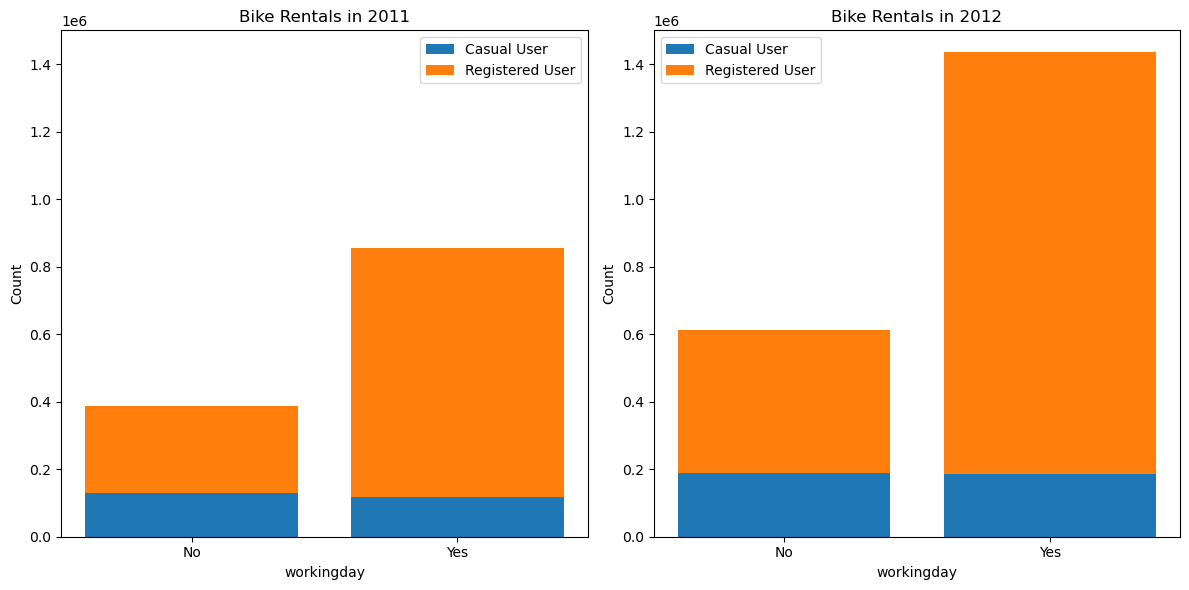

In [357]:
# plot the number of bike rentals in each workingday value in 2011 and 2012
analyze_variable(rentals_2011, rentals_2012, 'workingday', 1500000)

#### Conclusion 1: Hypothesis 4 is true, registered customers rent more bikes than casual customers either in working days or not. Also casual users rent more bikes during weekdays

## Hypothesis 5

### If the value of the the day period column is equal to night, then the number of bike rentals will be higher than the other periods

In [358]:
# Create two pivot tables to check the number of bike rentals in each day_period column value in 2011 and 2012 and order it in descending order
rentals_time_weather.pivot_table(index='day_period', columns='year', values='count', aggfunc='sum').sort_values(by=2012, ascending=False)
rentals_time_weather.pivot_table(index='day_period', columns='year', values='count', aggfunc='sum').sort_values(by=2011, ascending=False)

year,2011,2012
day_period,,
Afternoon,534650,883450
Morning,385190,651411
Night,260288,416049
Dawn,62975,98666


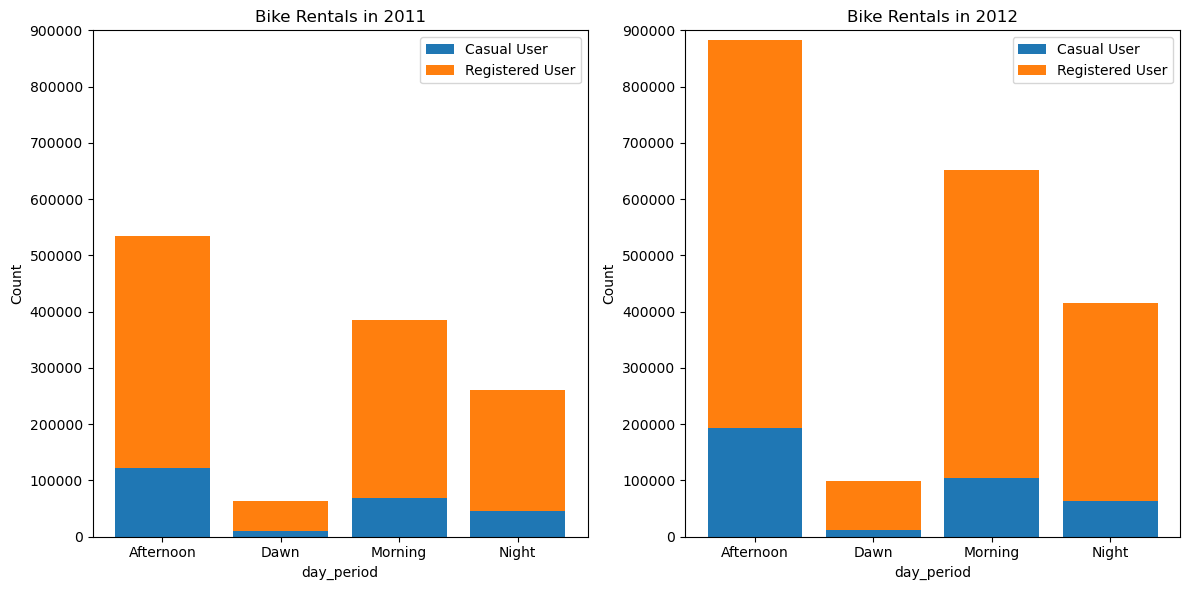

In [359]:
# plot the number of bike rentals in each day_period value in 2011 and 2012
analyze_variable(rentals_2011, rentals_2012, 'day_period', 900000)

#### Conclusion 1: Hypothesis 5 is false, the number of bike rentals is higher in the afternoon

## Hypothesis 6

#### If the value of the the weekday column is equal to monday, tuesday, wednesday, thursday and/or friday, then the number of bike rentals will be higher than the other days

In [363]:
# Create two pivot tables to check the number of bike rentals in each weekday column value in 2011 and 2012 and order it in descending order
rentals_time_weather.pivot_table(index='weekday', columns='year', values='count', aggfunc='sum').sort_values(by=2012, ascending=False)
rentals_time_weather.pivot_table(index='weekday', columns='year', values='count', aggfunc='sum').sort_values(by=2011, ascending=False)

year,2011,2012
weekday,,
Saturday,182006,305784
Wednesday,180338,288771
Tuesday,180221,275282
Sunday,179743,298064
Monday,177074,266953
Friday,174552,310843
Thursday,169169,303879


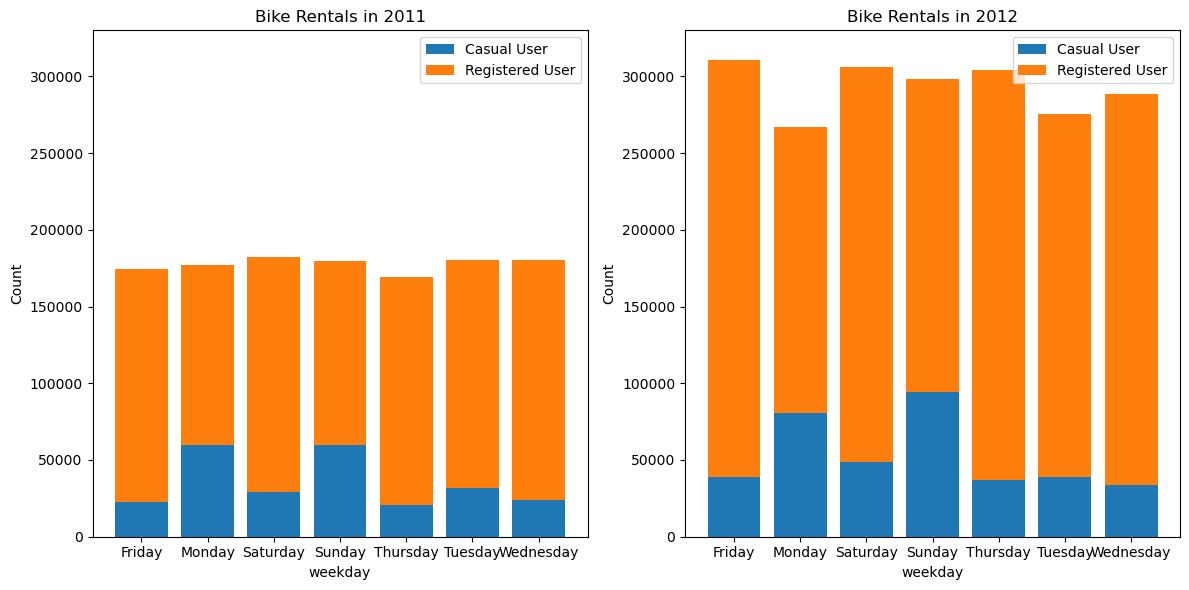

In [367]:
# Plot the number of bike rentals in each hour value in 2011 and 2012
analyze_variable(rentals_2011, rentals_2012, 'weekday', 330000)

#### Conclusion 1: Hypothesis 6 is not true, the number of bike rentals do not show a relevant variance in therms of total rentals per day in 2011 and 2012  

## Hypothesis 7

#### Hypothesis 7: if the value of the the month column is equal to june, july and/or august, then the number of bike rentals will be higher than the other months

In [194]:
# Create a pivot table to check the number of bike rentals in each month
rentals_per_month = pd.pivot_table(rentals_time_weather, index='month', values='count', aggfunc='sum').sort_values(by='count', ascending=False)
rentals_per_month

,count
month,
August,351194
June,346342
September,345991
July,344948
May,331686
October,322352
April,269094
November,254831
March,228920


In [195]:
# create a new df for rental_per_month df to check the number of bike rentals in each day using groupby function
rentals_per_month_df = rentals_time_weather.groupby('month').sum().sort_values(by='count', ascending=False)
rentals_per_month_df

/var/folders/zh/sct9634x6kvcb6_5gkff84nh0000gn/T/ipykernel_65271/631074760.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rentals_per_month_df = rentals_time_weather.groupby('month').sum().sort_values(by='count', ascending=False)


,instant,year,hour,temp,apparent_temp,humidity,windspeed,casual_user,registered_user,count
month,,,,,,,,,,
August,14423068,2966969,16968,37330.98,39828.9964,939.91,16945.3720,72039,279155,351194
June,11904480,2896560,16560,34779.70,37618.8708,829.16,17889.3149,73906,272436,346342
September,15055308,2890527,16554,30142.24,31954.1880,1026.67,15968.4718,70323,275668,345991
July,13390512,2993112,17112,40930.58,45339.6522,889.64,16555.4052,78157,266791,344948
May,11212080,2993112,17112,29693.82,31744.5300,1025.17,18243.2558,75285,256401,331686
October,16083176,2918669,16755,21616.30,22168.7152,1000.45,16713.4649,59760,262592,322352
April,9772612,2890525,16550,20248.74,20361.1890,845.12,22560.4075,60802,208292,269094
November,17112818,2890525,16552,13439.38,11847.1626,898.19,17692.5962,36603,218228,254831
March,9007175,2962946,17060,15278.60,13598.3556,867.67,21960.4091,44444,184476,228920


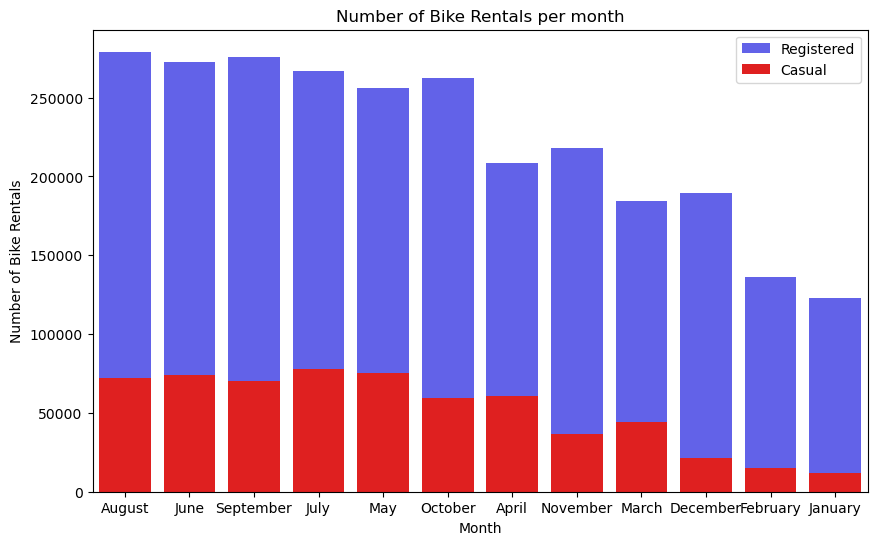

In [196]:
# create a bar plot that shows the number of bike rentals per month and the type of user
plt.figure(figsize=(10, 6))
sns.barplot(x=rentals_per_month_df.index, y=rentals_per_month_df['registered_user'], color='blue', label='Registered', alpha=0.7)   # we need to call this first to get the casual users on top of the registered users in the graph
sns.barplot(x=rentals_per_month_df.index, y=rentals_per_month_df['casual_user'], color='red', label='Casual')
plt.title('Number of Bike Rentals per month')
plt.xlabel('Month')
plt.ylabel('Number of Bike Rentals')
plt.legend()

# Adjust the y-axis tick labels to display the actual numbers without scientific notation
plt.ticklabel_format(style='plain', axis='y')

plt.show()

#### Conclusion 1: Hypothesis 7 is not true, because despite that the number of bike rentals in august and june are the top 2 on the records, the 3rd month with the highest number of bike rentals is september, which is not a summer month

## Hypothesis 8

#### If the value of the the hour column is equal to 8, 17 and/or 18, then the number of bike rentals will be higher than the other hours

In [197]:
# Create a pivot table to check the number of bike rentals in each hour
rentals_per_hour = pd.pivot_table(rentals_time_weather, index='hour', values='count', aggfunc='sum').sort_values(by='count', ascending=False)
rentals_per_hour

,count
hour,
17,336860
18,309772
8,261001
16,227748
19,226789
13,184919
12,184414
15,183149
14,175652


In [198]:
# create a new df for rental_per_hour df to check the number of bike rentals in each hour using groupby function
rentals_per_hour_df = rentals_time_weather.groupby('hour').sum().sort_values(by='count', ascending=False)
rentals_per_hour_df

/var/folders/zh/sct9634x6kvcb6_5gkff84nh0000gn/T/ipykernel_65271/2645125458.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rentals_per_hour_df = rentals_time_weather.groupby('hour').sum().sort_values(by='count', ascending=False)


,instant,year,temp,apparent_temp,humidity,windspeed,casual_user,registered_user,count
hour,,,,,,,,,
17,6320083,1468395,13187.48,13528.9442,374.81,11414.1803,54220,282640,336860
18,6314588,1464373,12693.06,12987.9454,390.20,10959.1632,44496,265276,309772
8,6296660,1462361,9730.66,9493.1216,510.85,8600.1937,15761,245240,261001
16,6319353,1468395,13543.74,13973.9030,361.93,11607.1738,53834,173914,227748
19,6315316,1464373,12111.20,12349.9894,416.74,10250.1625,35505,191284,226789
13,6316578,1466384,13174.80,13619.8674,372.95,10825.2168,52713,132206,184919
12,6299965,1464372,12662.04,12995.9842,390.72,10536.2391,49718,134696,184414
15,6318036,1466384,13650.44,14153.8668,358.76,11485.0864,54606,128543,183149
14,6317307,1466384,13529.18,14037.9180,362.30,11354.1617,55089,120563,175652


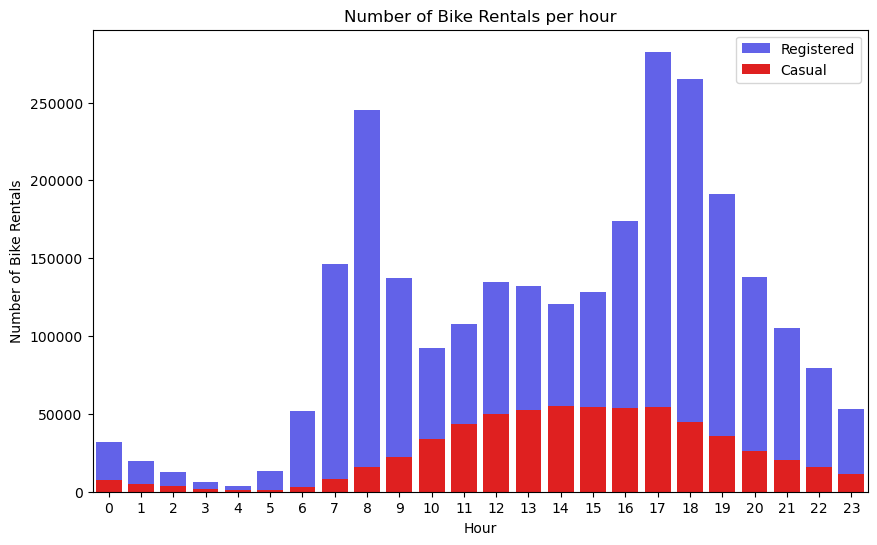

In [199]:
# create a bar plot that shows the number of bike rentals per weather and the type of user
plt.figure(figsize=(10, 6))
sns.barplot(x=rentals_per_hour_df.index, y=rentals_per_hour_df['registered_user'], color='blue', label='Registered', alpha=0.7)   # we need to call this first to get the casual users on top of the registered users in the graph
sns.barplot(x=rentals_per_hour_df.index, y=rentals_per_hour_df['casual_user'], color='red', label='Casual')
plt.title('Number of Bike Rentals per hour')
plt.xlabel('Hour')
plt.ylabel('Number of Bike Rentals')
plt.legend()

# Adjust the y-axis tick labels to display the actual numbers without scientific notation
plt.ticklabel_format(style='plain', axis='y')

plt.show()

#### Conclusion 1: Hypothesis 8 is not true, because the number of bike rentals is higher in the hour 17 and 18, but not in the hour 8

#### Conclusion 2: Considering the number of bike rentals by casual users, the hours with most rentals are 14:00, 15:00, 16:00 and 17:00.

## Hypothesis 9

#### If the value of the holiday column is equal to yes, then the number of bike rentals will be higher than when its not holiday time

In [200]:
# create a pivot table to check the number of bike rentals in each holiday situation for the casual and registered users
rentals_per_holiday = pd.pivot_table(rentals_time_weather, index='holiday', values='count', aggfunc='sum').sort_values(by='count', ascending=False)
rentals_per_holiday

,count
holiday,
No,3214244
Yes,78435


In [201]:
# create a new df for rental_per_holiday df to check the number of bike rentals in each day using groupby function
rentals_per_holiday_df = rentals_time_weather.groupby('holiday').sum().sort_values(by='count', ascending=False)
rentals_per_holiday_df

/var/folders/zh/sct9634x6kvcb6_5gkff84nh0000gn/T/ipykernel_65271/3178285321.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rentals_per_holiday_df = rentals_time_weather.groupby('holiday').sum().sort_values(by='count', ascending=False)


,instant,year,hour,temp,apparent_temp,humidity,windspeed,casual_user,registered_user,count
holiday,,,,,,,,,,
No,146463923,33952142,194888,259953.18,260976.6398,10592.93,214885.1001,597658,2616586,3214244
Yes,4559587,1005761,5783,6960.40,6680.0632,307.68,6463.2220,22359,56076,78435


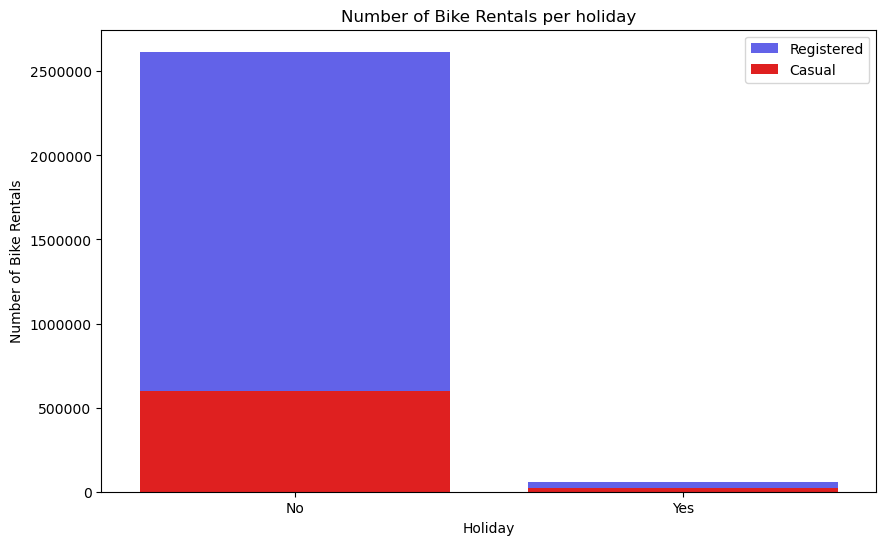

In [202]:
# create a bar plot that shows the number of bike rentals per weather and the type of user
plt.figure(figsize=(10, 6))
sns.barplot(x=rentals_per_holiday_df.index, y=rentals_per_holiday_df['registered_user'], color='blue', label='Registered', alpha=0.7)   # we need to call this first to get the casual users on top of the registered users in the graph
sns.barplot(x=rentals_per_holiday_df.index, y=rentals_per_holiday_df['casual_user'], color='red', label='Casual')
plt.title('Number of Bike Rentals per holiday')
plt.xlabel('Holiday')
plt.ylabel('Number of Bike Rentals')
plt.legend()

# Adjust the y-axis tick labels to display the actual numbers without scientific notation
plt.ticklabel_format(style='plain', axis='y')

plt.show()

#### Conclusion 1: Hypothesis 9 is false, because the number of bike rentals is higher in the non-holiday days

## Hypothesis 10

#### If the values of the year column is equal to 2011, then the number of bike rentals will be higher than in 2012 create a pivot table to check the number of bike rentals in each holiday

In [203]:
# create a pivot table to check the number of bike rentals in years 2011 and 2012  for the casual and registered users
rentals_per_year = pd.pivot_table(rentals_time_weather, index='year', values='count', aggfunc='sum').sort_values(by='count', ascending=False)
rentals_per_year

,count
year,
2012,2049576
2011,1243103


In [204]:
# create a new df for rental_per_year df to check the number of bike rentals in each year using groupby function
rentals_per_year_df = rentals_time_weather.groupby('year').sum().sort_values(by='count', ascending=False)
rentals_per_year_df

/var/folders/zh/sct9634x6kvcb6_5gkff84nh0000gn/T/ipykernel_65271/3673354019.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rentals_per_year_df = rentals_time_weather.groupby('year').sum().sort_values(by='count', ascending=False)


,instant,hour,temp,apparent_temp,humidity,windspeed,casual_user,registered_user,count
year,,,,,,,,,
2012,113651175,100617,137357.58,138379.1156,5338.16,110618.4807,372765,1676811,2049576
2011,37372335,100054,129556.00,129277.5874,5562.45,110729.8414,247252,995851,1243103


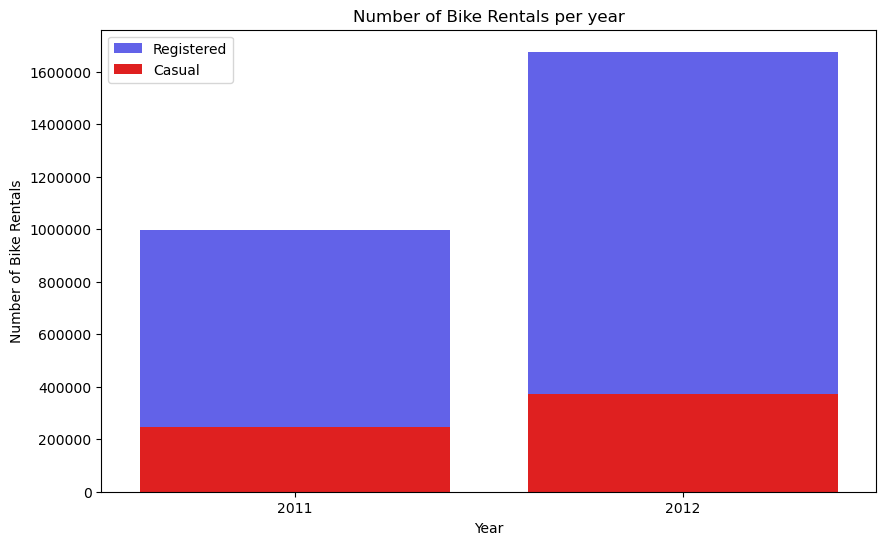

In [205]:
# create a bar plot that shows the number of bike rentals per weather and the type of user
plt.figure(figsize=(10, 6))
sns.barplot(x=rentals_per_year_df.index, y=rentals_per_year_df['registered_user'], color='blue', label='Registered', alpha=0.7)   # we need to call this first to get the casual users on top of the registered users in the graph
sns.barplot(x=rentals_per_year_df.index, y=rentals_per_year_df['casual_user'], color='red', label='Casual')
plt.title('Number of Bike Rentals per year')
plt.xlabel('Year')
plt.ylabel('Number of Bike Rentals')
plt.legend()

# Adjust the y-axis tick labels to display the actual numbers without scientific notation
plt.ticklabel_format(style='plain', axis='y')

plt.show()

#### Conclusion 1: Hypothesis 10 is not true, the number of bike rentals is higher in 2012

## Hypothesis 11 

#### If the values of the windspeed_level column is equal to strong, then the number of bike rentals will be lower than the  when the windspeed is low 

In [206]:
# create a pivot table to check the number of bike rentals in each windspeed level
rentals_per_windspeed_level = pd.pivot_table(rentals_time_weather, index='windspeed_level', values='count', aggfunc='sum').sort_values(by='count', ascending=False)
rentals_per_windspeed_level


,count
windspeed_level,
Medium,1662619
Low,1139251
High,490809


In [207]:
# create a new df for rental_per_windspeed_level df to check the number of bike rentals in each day using groupby function
rentals_per_windspeed_level_df = rentals_time_weather.groupby('windspeed_level').sum().sort_values(by='count', ascending=False)
rentals_per_windspeed_level_df

/var/folders/zh/sct9634x6kvcb6_5gkff84nh0000gn/T/ipykernel_65271/2918879488.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rentals_per_windspeed_level_df = rentals_time_weather.groupby('windspeed_level').sum().sort_values(by='count', ascending=False)


,instant,year,hour,temp,apparent_temp,humidity,windspeed,casual_user,registered_user,count
windspeed_level,,,,,,,,,,
Medium,69172412,16124223,96971,128398.10,128922.6690,4866.55,120967.1600,325465,1337154,1662619
Low,62772307,14000084,72506,105340.12,108210.2718,4771.09,35514.6833,201348,937903,1139251
High,19078791,4833596,31194,33175.36,30523.7622,1262.97,64866.4788,93204,397605,490809


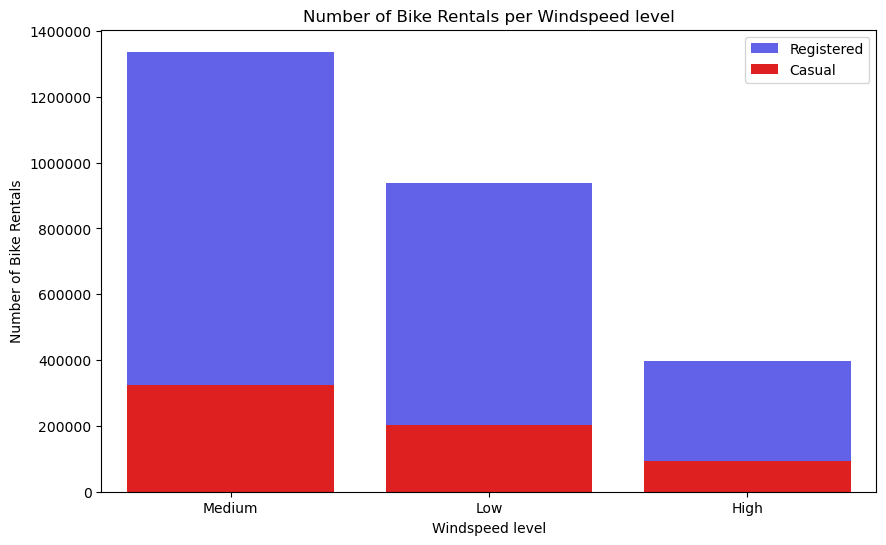

In [208]:
# create a bar plot that shows the number of bike rentals per Windspeed level and the type of user
plt.figure(figsize=(10, 6))
sns.barplot(x=rentals_per_windspeed_level_df.index, y=rentals_per_windspeed_level_df['registered_user'], color='blue', label='Registered', alpha=0.7)   # we need to call this first to get the casual users on top of the registered users in the graph
sns.barplot(x=rentals_per_windspeed_level_df.index, y=rentals_per_windspeed_level_df['casual_user'], color='red', label='Casual')
plt.title('Number of Bike Rentals per Windspeed level')
plt.xlabel('Windspeed level')
plt.ylabel('Number of Bike Rentals')
plt.legend()

# Adjust the y-axis tick labels to display the actual numbers without scientific notation
plt.ticklabel_format(style='plain', axis='y')

plt.show()

#### Hypothesis 11 is not true, since the number of bike rentals is higher when the windspeed is medium

## Hypothesis 12

#### If the values of the humidity_level column is equal to high, then the number of bike rentals will be lower than the  when the humidity is low


In [209]:
# create a pivot table to check the number of bike rentals in each humidity level
rentals_per_humidity_level = pd.pivot_table(rentals_time_weather, index='humidity_level', values='count', aggfunc='sum').sort_values(by='count', ascending=False)
rentals_per_humidity_level

,count
humidity_level,
Medium,1766342
High,818029
Low,708308


In [210]:
# create a new df for rental_per_humidity_level df to check the number of bike rentals in each day using groupby function
rentals_per_humidity_level_df = rentals_time_weather.groupby('humidity_level').sum().sort_values(by='count', ascending=False)
rentals_per_humidity_level_df

/var/folders/zh/sct9634x6kvcb6_5gkff84nh0000gn/T/ipykernel_65271/4021983679.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rentals_per_humidity_level_df = rentals_time_weather.groupby('humidity_level').sum().sort_values(by='count', ascending=False)


,instant,year,hour,temp,apparent_temp,humidity,windspeed,casual_user,registered_user,count
humidity_level,,,,,,,,,,
Medium,74517270,16979170,102153,129220.58,130360.6174,4714.56,112119.2874,342189,1424153,1766342
High,56004185,12992048,61798,95911.76,96187.6422,5375.80,67211.4855,114223,703806,818029
Low,20502055,4986685,36720,41781.24,41108.4434,810.25,42017.5492,163605,544703,708308


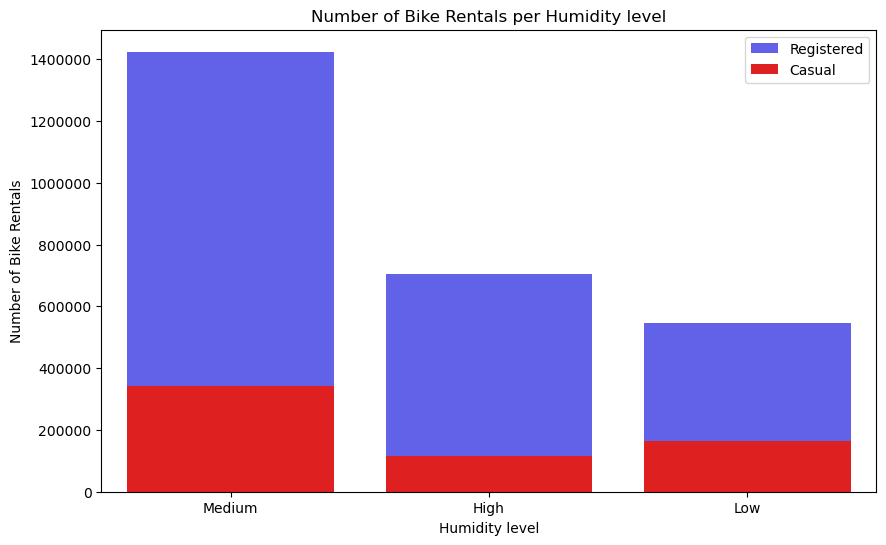

In [211]:
# create a bar plot that shows the number of bike rentals per Humidity level and the type of user
plt.figure(figsize=(10, 6))
sns.barplot(x=rentals_per_humidity_level_df.index, y=rentals_per_humidity_level_df['registered_user'], color='blue', label='Registered', alpha=0.7)   # we need to call this first to get the casual users on top of the registered users in the graph
sns.barplot(x=rentals_per_humidity_level_df.index, y=rentals_per_humidity_level_df['casual_user'], color='red', label='Casual')
plt.title('Number of Bike Rentals per Humidity level')
plt.xlabel('Humidity level')
plt.ylabel('Number of Bike Rentals')
plt.legend()

# Adjust the y-axis tick labels to display the actual numbers without scientific notation
plt.ticklabel_format(style='plain', axis='y')

plt.show()

#### Hypothesis 12 is not true, the number of bike rentals is higher when the humidity is medium

# Gepgraphical analysis

## Start_station_long_lat dataset 

In [212]:
# import start_stations_long_lat.csv
start_stations_long_lat = pd.read_csv('../datasets/start_stations_long_lat.csv', sep=';')

# print first 5 rows
display(start_stations_long_lat.head())

,Start station,counts,Start station latitude,Start station longitude
0,10th & E St NW,6280,38.896136,-77.022843
1,10th & Monroe St NE,5423,38.932514,-76.992889
2,10th & U St NW,38149,38.917007,-77.024112
3,10th St & Constitution Ave NW,33682,38.891931,-77.025990
4,11th & F St NW,38,38.897206,-77.022971


 ### Top10 Start Stations

In [213]:
# create a table with the top 10 stations with the highest number of trips
trip_start_top10 = start_stations_long_lat['Start station'].value_counts().head(10).sort_values(ascending=False)

display(trip_start_top10)

10th & E St NW                         1
Lee Hwy & N Adams St                   1
Fairfax Village                        1
Florida Ave & R St NW                  1
Gallaudet / 8th St & Florida Ave NE    1
George Mason Dr & Wilson Blvd          1
Georgetown Harbor / 30th St NW         1
Georgia & New Hampshire Ave NW         1
Georgia Ave and Fairmont St NW         1
Glebe Rd & 11th St N                   1
Name: Start station, dtype: int64

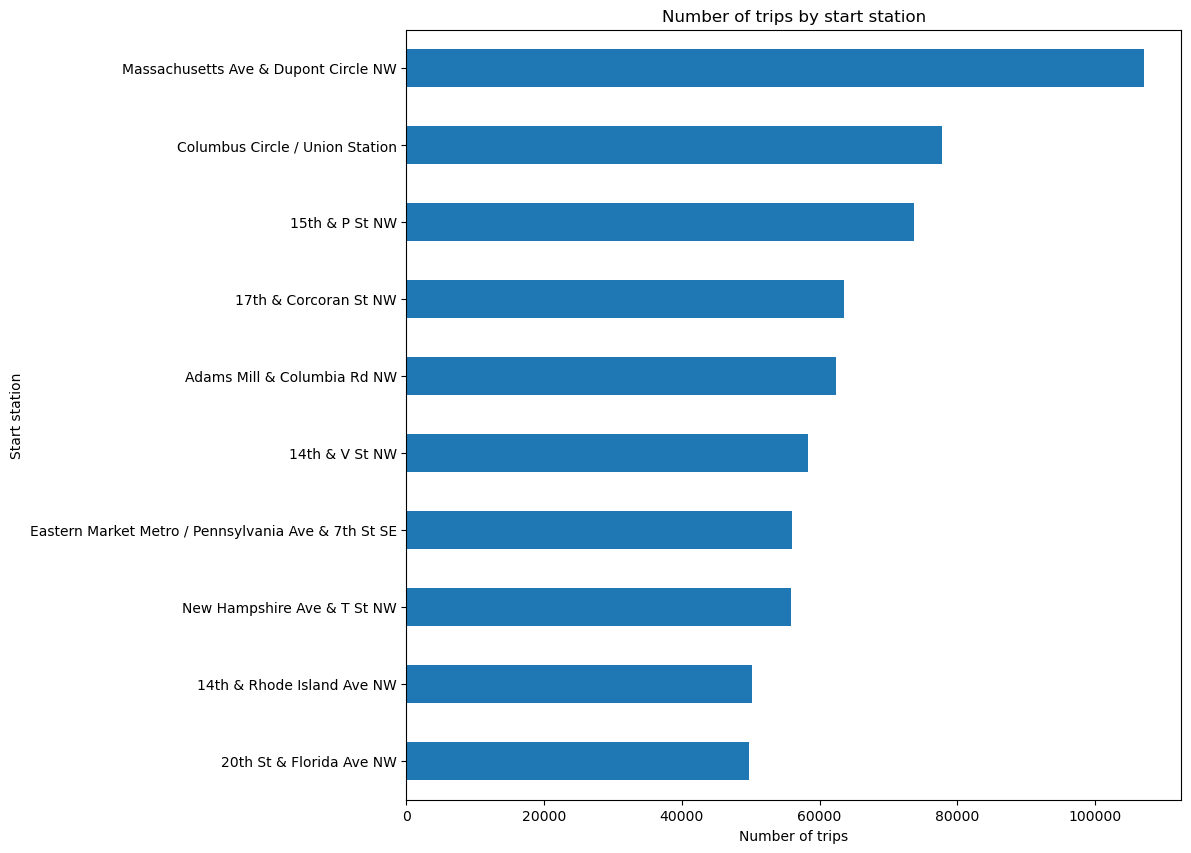

In [214]:
# create a a plot to show the number of trips by start station in the map of washington DC limit the graphic to 15. Exchange the x and y axis to show the stations in the y axis. Order the stations by number of trips in descending order
trip_start_station = trip['Start station'].value_counts().head(10).sort_values(ascending=False).plot(kind='barh', figsize=(10, 10))
trip_start_station.set_xlabel('Number of trips')
trip_start_station.set_ylabel('Start station')
trip_start_station.set_title('Number of trips by start station')

# make the bars vertical
trip_start_station.invert_yaxis()

# show the plot
plt.show()


## Visualization the start stations on a Heatmap

In [215]:
# Create a heatmap layer using the start station coordinates and counts
heat_data = start_stations_long_lat[['Start station latitude', 'Start station longitude', 'counts']].values.tolist()
start_station_map = folium.Map(location=[38.9072, -77.0369], zoom_start=12)
HeatMap(heat_data).add_to(start_station_map)

# Add markers to the map with the count number of each start station
for lat, lng, label, count in zip(start_stations_long_lat['Start station latitude'], start_stations_long_lat['Start station longitude'], start_stations_long_lat['Start station'], start_stations_long_lat['counts']):
    if isinstance(lat, float) and isinstance(lng, float):
        folium.Marker(
            [lat, lng],
            popup=label,
            icon=folium.Icon(color='blue', icon='bicycle', prefix='fa', icon_size=(1,1)),
            tooltip=f"{count} trips"
        ).add_to(start_station_map)

# Display the map
start_station_map

## End_stations_long_lat dataset

In [216]:
# import end_stations_long_lat.csv
end_stations_long_lat = pd.read_csv('../datasets/end_stations_long_lat.csv')

# print first 5 rows
display(end_stations_long_lat.head())

,End station,Count,End station latitude,End station longitude
0,Massachusetts Ave & Dupont Circle NW,118707,38.910100,-77.044400
1,15th & P St NW,83457,38.909627,-77.044409
2,Columbus Circle / Union Station,79681,38.897027,-77.004915
3,17th & Corcoran St NW,67382,38.912083,-77.038646
4,14th & V St NW,59658,38.918116,-77.035802


 ### Top10 End Stations

In [217]:
# get a table with the top 10 start stations
trip_end_station_top10 = trip['End station'].value_counts().head(10).sort_values(ascending=False)
trip_end_station_top10

Massachusetts Ave & Dupont Circle NW                   118707
15th & P St NW                                          83457
Columbus Circle / Union Station                         79681
17th & Corcoran St NW                                   67382
14th & V St NW                                          59658
New Hampshire Ave & T St NW                             57145
8th & H St NW                                           54811
21st & I St NW                                          54259
Eastern Market Metro / Pennsylvania Ave & 7th St SE     54070
Adams Mill & Columbia Rd NW                             52546
Name: End station, dtype: int64

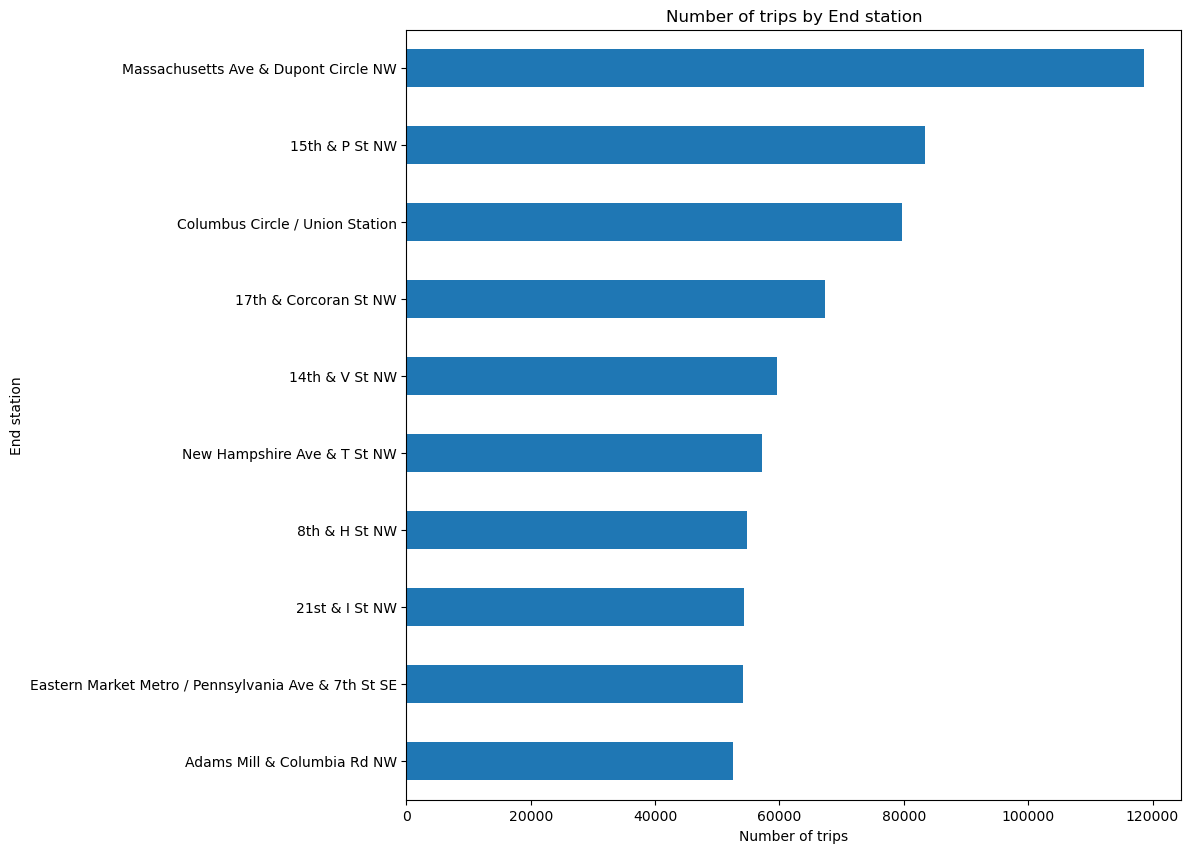

In [218]:
# create a a plot to show the number of trips by End station in the map of washington DC limit the graphic to 15. Exchange the x and y axis to show the stations in the y axis. Order the stations by number of trips in descending order
trip_end_station_top10 = trip_end_station_top10.plot(kind='barh', figsize=(10, 10))
trip_end_station_top10.set_xlabel('Number of trips')
trip_end_station_top10.set_ylabel('End station')
trip_end_station_top10.set_title('Number of trips by End station')

# make the bars vertical
trip_end_station_top10.invert_yaxis()

# show the plot
plt.show()

In [219]:
# Create a heatmap layer using the end station coordinates and counts
heat_data = end_stations_long_lat[['End station latitude', 'End station longitude', 'Count']].values.tolist()
end_station_map = folium.Map(location=[38.9072, -77.0369], zoom_start=12)
HeatMap(heat_data).add_to(end_station_map)

# Add markers to the map with the count number of each end station
for lat, lng, label, count in zip(end_stations_long_lat['End station latitude'], end_stations_long_lat['End station longitude'], end_stations_long_lat['End station'], end_stations_long_lat['Count']):
    if isinstance(lat, float) and isinstance(lng, float):
        folium.Marker(
            [lat, lng],
            popup=label,
            icon=folium.Icon(color='blue', icon='bicycle', prefix='fa', icon_size=(1,1)),
            tooltip=f"{count} trips"
        ).add_to(end_station_map)

# Display the map
end_station_map

# Rentals_end_start_station dataset

In [221]:
# import rentals_end_start_stations.csv
rentals_end_start_stations = pd.read_csv('../datasets/rentals_end_start_stations.csv')

# print first 5 rows
display(rentals_end_start_stations.head())

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,3548,2011-01-01 00:01:29,2011-01-01 01:00:37,31620,5th & F St NW,31620,5th & F St NW,W00247,Member
1,346,2011-01-01 00:02:46,2011-01-01 00:08:32,31105,14th & Harvard St NW,31101,14th & V St NW,W00675,Casual
2,562,2011-01-01 00:06:13,2011-01-01 00:15:36,31400,Georgia & New Hampshire Ave NW,31104,Adams Mill & Columbia Rd NW,W00357,Member
3,434,2011-01-01 00:09:21,2011-01-01 00:16:36,31111,10th & U St NW,31503,Florida Ave & R St NW,W00970,Member
4,233,2011-01-01 00:28:26,2011-01-01 00:32:19,31104,Adams Mill & Columbia Rd NW,31106,Calvert & Biltmore St NW,W00346,Casual


## Top 10 trips between start and end stations

In [224]:
# Group the dataframe by "Start station" and "End station" columns and count the occurrences
trip_counts = rentals_end_start_stations.groupby(['Start station', 'End station']).size().reset_index(name='Count')

In [225]:
# Sort the trips by count in descending order
sorted_trips = trip_counts.sort_values(by='Count', ascending=False)

In [232]:
# Extract the top 10 most repeated trips
top_10_trips = sorted_trips.head(10)

In [233]:
# Print the top 10 trips
print("Top 10 Most Repeated Trips:")
for index, trip in top_20_trips.iterrows():
    print("Start Station:", trip['Start station'])
    print("End Station:", trip['End station'])
    print("Count:", trip['Count'])
    print()

Top 10 Most Repeated Trips:
Start Station: Eastern Market Metro / Pennsylvania Ave & 7th St SE
End Station: Lincoln Park / 13th & East Capitol St NE 
Count: 10205

Start Station: Adams Mill & Columbia Rd NW
End Station: Calvert & Biltmore St NW
Count: 9278

Start Station: Lincoln Park / 13th & East Capitol St NE 
End Station: Eastern Market Metro / Pennsylvania Ave & 7th St SE
Count: 8770

Start Station: Calvert & Biltmore St NW
End Station: Adams Mill & Columbia Rd NW
Count: 8722

Start Station: Massachusetts Ave & Dupont Circle NW
End Station: 15th & P St NW
Count: 6713

Start Station: New Hampshire Ave & T St NW
End Station: Massachusetts Ave & Dupont Circle NW
Count: 6386

Start Station: 15th & P St NW
End Station: Massachusetts Ave & Dupont Circle NW
Count: 6044

Start Station: 13th & D St NE
End Station: Columbus Circle / Union Station
Count: 5801

Start Station: Massachusetts Ave & Dupont Circle NW
End Station: New Hampshire Ave & T St NW
Count: 5452

Start Station: Columbus Cir

In [234]:
top_10_trips

,Start station,End station,Count
14910,Eastern Market Metro / Pennsylvania Ave & 7th ...,Lincoln Park / 13th & East Capitol St NE,10205
11690,Adams Mill & Columbia Rd NW,Calvert & Biltmore St NW,9278
17691,Lincoln Park / 13th & East Capitol St NE,Eastern Market Metro / Pennsylvania Ave & 7th ...,8770
12914,Calvert & Biltmore St NW,Adams Mill & Columbia Rd NW,8722
18435,Massachusetts Ave & Dupont Circle NW,15th & P St NW,6713
19409,New Hampshire Ave & T St NW,Massachusetts Ave & Dupont Circle NW,6386
3539,15th & P St NW,Massachusetts Ave & Dupont Circle NW,6044
1266,13th & D St NE,Columbus Circle / Union Station,5801
18548,Massachusetts Ave & Dupont Circle NW,New Hampshire Ave & T St NW,5452
13715,Columbus Circle / Union Station,13th & D St NE,5359


In [236]:
# create 4 columns with the latitude and longitude of the start and end stations
top_10_trips['Start station latitude'] = top_10_trips['Start station'].map(start_stations_long_lat.set_index('Start station')['Start station latitude'])
top_10_trips['Start station longitude'] = top_10_trips['Start station'].map(start_stations_long_lat.set_index('Start station')['Start station longitude'])
top_10_trips['End station latitude'] = top_10_trips['End station'].map(end_stations_long_lat.set_index('End station')['End station latitude'])
top_10_trips['End station longitude'] = top_10_trips['End station'].map(end_stations_long_lat.set_index('End station')['End station longitude'])

# print first 5 rows
display(top_10_trips.head())


/var/folders/zh/sct9634x6kvcb6_5gkff84nh0000gn/T/ipykernel_65271/3610081830.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_trips['Start station latitude'] = top_10_trips['Start station'].map(start_stations_long_lat.set_index('Start station')['Start station latitude'])
/var/folders/zh/sct9634x6kvcb6_5gkff84nh0000gn/T/ipykernel_65271/3610081830.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_trips['Start station longitude'] = top_10_trips['Start station'].map(start_stations_long_lat.set

,Start station,End station,Count,Start station latitude,Start station longitude,End station latitude,End station longitude
14910,Eastern Market Metro / Pennsylvania Ave & 7th ...,Lincoln Park / 13th & East Capitol St NE,10205,38.884056,-76.995262,38.917007,-77.024112
11690,Adams Mill & Columbia Rd NW,Calvert & Biltmore St NW,9278,38.922972,-77.042412,38.892609,-77.042787
17691,Lincoln Park / 13th & East Capitol St NE,Eastern Market Metro / Pennsylvania Ave & 7th ...,8770,NaN,NaN,38.884056,-76.995262
12914,Calvert & Biltmore St NW,Adams Mill & Columbia Rd NW,8722,38.923211,-77.047639,38.922972,-77.042412
18435,Massachusetts Ave & Dupont Circle NW,15th & P St NW,6713,38.910100,-77.044400,38.909627,-77.044409


In [240]:
# search for null values
top_10_trips.isnull().sum()

Start station              0
End station                0
Count                      0
Start station latitude     1
Start station longitude    1
End station latitude       0
End station longitude      0
dtype: int64

In [239]:
# export top_10_trips.csv to fill the table NaN values manually
# top_10_trips.to_csv('../datasets/top_10_trips.csv', index=False) #---- commented in order to not overwrite the file

In [254]:
# import top_10_trips.csv
top_10_trips = pd.read_csv('../datasets/top_10_trips.csv')

# print first 5 rows
display(top_10_trips.head(10))

,Start station,End station,Count,Start station latitude,Start station longitude,End station latitude,End station longitude
0,Eastern Market Metro / Pennsylvania Ave & 7th ...,Lincoln Park / 13th & East Capitol St NE,10205,38.884056,-76.995262,38.917007,-77.024112
1,Adams Mill & Columbia Rd NW,Calvert & Biltmore St NW,9278,38.922972,-77.042412,38.892609,-77.042787
2,Lincoln Park / 13th & East Capitol St NE,Eastern Market Metro / Pennsylvania Ave & 7th ...,8770,38.890618,-76.988359,38.884056,-76.995262
3,Calvert & Biltmore St NW,Adams Mill & Columbia Rd NW,8722,38.923211,-77.047639,38.922972,-77.042412
4,Massachusetts Ave & Dupont Circle NW,15th & P St NW,6713,38.910100,-77.044400,38.909627,-77.044409
5,New Hampshire Ave & T St NW,Massachusetts Ave & Dupont Circle NW,6386,38.915540,-77.038180,38.910100,-77.044400
6,15th & P St NW,Massachusetts Ave & Dupont Circle NW,6044,38.909627,-77.044409,38.910100,-77.044400
7,13th & D St NE,Columbus Circle / Union Station,5801,38.894832,-76.987633,38.897027,-77.004915
8,Massachusetts Ave & Dupont Circle NW,New Hampshire Ave & T St NW,5452,38.910100,-77.044400,38.915540,-77.038180
9,Columbus Circle / Union Station,13th & D St NE,5359,38.897027,-77.004915,38.901961,-77.043991


In [242]:
# search for null values
top_10_trips.isnull().sum()

Start station              0
End station                0
Count                      0
Start station latitude     0
Start station longitude    0
End station latitude       0
End station longitude      0
dtype: int64

# Top 10 trips in a map (separately)

In [286]:
# create a function that can be used to visualize the route between two stations in a map for the top10 trips

def create_route_map(start_point, end_point):
    # Create a map centered on the start point
    map_center = start_point
    zoom_level = 15
    m = folium.Map(location=map_center, zoom_start=zoom_level)

    # Add a marker for the start point
    folium.Marker(start_point, popup='Start Point', icon=folium.Icon(color='green')).add_to(m)

    # Add a marker for the end point
    folium.Marker(end_point, popup='End Point', icon=folium.Icon(color='red')).add_to(m)

    # Make a request to the OSRM API to obtain the route
    url = f'http://router.project-osrm.org/route/v1/driving/{start_point[1]},{start_point[0]};{end_point[1]},{end_point[0]}?overview=full'
    response = requests.get(url)
    route_data = response.json()

    # Extract the route geometry
    route_geometry = polyline.decode(route_data['routes'][0]['geometry'])
    route_points = [(point[0], point[1]) for point in route_geometry]

    # Draw a line along the route path
    line = folium.PolyLine(locations=route_points, color='red', weight=5)
    m.add_child(line)

    return m

### 1st most repeated trip

In [260]:
# create a map for the 1st most repeated trip (Eastern Market Metro / Pennsylvania Ave & 7th St SE to Lincoln Park / 13th & East Capitol St NE)
start_point1 = [38.887777, -77.005833]  # Eastern Market Metro / Pennsylvania Ave & 7th St SE
end_point1 = [38.890222, -76.988432]  # Lincoln Park / 13th & East Capitol St NE

map1 = create_route_map(start_point1, end_point1)
map1.save('route1.html')
map1


### 2nd most repeated trip

In [266]:
# create a map for the 2st most repeated trip (Adams Mill & Columbia Rd NW	Calvert & Biltmore St NW)
start_point2 = [38.922972, -77.042412]  # Adams Mill & Columbia Rd NW
end_point2 = [38.892609, -77.042787]  # Calvert & Biltmore St NW

map2 = create_route_map(start_point2, end_point2)
map2.save('route2.html')
map2


### 3rd most repeated trip

In [269]:
# create a map for the 3st most repeated trip (Lincoln Park / 13th & East Capitol St NE to Eastern Market Metro / Pennsylvania Ave & 7th St SE)
start_point3 = [38.890618, -76.988359]  # Lincoln Park / 13th & East Capitol St NE
end_point3 = [38.884056, -76.995262]  # Eastern Market Metro / Pennsylvania Ave & 7th St SE

map3 = create_route_map(start_point3, end_point3)
map3.save('route3.html')
map3

### 4th most repeated trip

In [270]:
# create a map for the 4st most repeated trip (Calvert & Biltmore St NW	Adams Mill & Columbia Rd NW)
start_point4 = [38.923211, -77.047639]  # Calvert & Biltmore St NW
end_point4 = [38.922972, -77.042412]  # Adams Mill & Columbia Rd NW

map4 = create_route_map(start_point4, end_point4)
map4.save('route4.html')
map4

### 5th most repeated trip

In [271]:
# create a map for the 5st most repeated trip (Massachusetts Ave & Dupont Circle NW	15th & P St NW)
start_point5 = [38.910100, -77.044400]  # Massachusetts Ave & Dupont Circle NW
end_point5 = [38.909627, -77.044409]  # 15th & P St NW

map5 = create_route_map(start_point5, end_point5)
map5.save('route5.html')
map5

### 6th most repeated trip

In [272]:
# create a map for the 6st most repeated trip (New Hampshire Ave & T St NW	Massachusetts Ave & Dupont Circle NW)
start_point6 = [38.915540, -77.038180]  # New Hampshire Ave & T St NW
end_point6 = [38.910100, -77.044400]  # Massachusetts Ave & Dupont Circle NW

map6 = create_route_map(start_point6, end_point6)
map6.save('route6.html')
map6

### 7th most repeated trip

In [273]:
# create a map for the 7st most repeated trip (15th & P St NW	Massachusetts Ave & Dupont Circle NW)	
start_point7 = [38.909627, -77.044409]  # 15th & P St NW
end_point7 = [38.910100, -77.044400]  # Massachusetts Ave & Dupont Circle NW

map7 = create_route_map(start_point7, end_point7)
map7.save('route7.html')
map7

### 8th most repeated trip

In [274]:
# create a map for the 8st most repeated trip (13th & D St NE	Columbus Circle / Union Station)
start_point8 = [38.894832, -76.987633]  # 13th & D St NE
end_point8 = [38.897027, -77.004915]  # Columbus Circle / Union Station

map8 = create_route_map(start_point8, end_point8)
map8.save('route8.html')
map8

### 9th most repeated trip

In [275]:
# create a map for the 9st most repeated trip (Massachusetts Ave & Dupont Circle NW	New Hampshire Ave & T St NW)
start_point9 = [38.910100, -77.044400]  # Massachusetts Ave & Dupont Circle NW
end_point9 = [38.915540, -77.038180]  # New Hampshire Ave & T St NW

map9 = create_route_map(start_point9, end_point9)
map9.save('route9.html')
map9

### 10th most repeated trip

In [276]:
# create a map for the 10st most repeated trip (Columbus Circle / Union Station	13th & D St NE)	
start_point10 = [38.897027, -77.004915]  # Columbus Circle / Union Station
end_point10 = [38.901961, -77.043991]  # 13th & D St NE

map10 = create_route_map(start_point10, end_point10)
map10.save('route10.html')
map10

# Top 10 most repeated trips in Washington DC (altogether)

In [301]:
# Create the map
map_top10_trips = folium.Map(location=[38.9072, -77.0369], zoom_start=14)

# Define colors for the route lines
colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow', 'brown', 'pink', 'gray', 'cyan']

# Add markers and route lines for each trip
for idx, row in top_10_trips.iterrows():
    start_point = [row['Start station latitude'], row['Start station longitude']]
    end_point = [row['End station latitude'], row['End station longitude']]
    
    # Add a marker for the start point
    start_marker = folium.Marker(
        location=start_point,
        icon=folium.Icon(color='green'),
        tooltip=row['Start station']
    ).add_to(map_top10_trips)
    
    # Add a marker for the end point
    end_marker = folium.Marker(
        location=end_point,
        icon=folium.Icon(color='red'),
        tooltip=row['End station']
    ).add_to(map_top10_trips)
    
    # Get the route geometry
    route_geometry = get_route_geometry(start_point, end_point)
    
    # Choose a color for the route line
    color = colors[idx % len(colors)]
    
    # Create a line connecting the start and end point following the route path
    line = folium.PolyLine(
        locations=route_geometry,
        weight=5,
        color=color
    ).add_to(map_top10_trips)

map_top10_trips.save('top_10_trips.html')
map_top10_trips